<a href="https://colab.research.google.com/github/Ramu-the-noob/mec-charge-ai-/blob/main/Copy_of_Basics_Of_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Opening the Dataset**

Link For Dataset: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/loan_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# **Understanding the Dataset**


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

`df.describe()` gives a quick statistical summary of each numerical column in the dataset. It helps identify:
- Central tendency (mean, median),
- Spread (standard deviation),
- Outliers (min/max),
- Missing or skewed values.

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


### What Each Statistic Means:

- **count**: Number of non-null values. Helps identify which features have missing data.
- **mean**: Average value — gives a measure of central tendency of the feature.
- **std**: Standard deviation — shows how much the data varies from the mean. A higher std means more spread.
- **min**: Minimum value — useful for detecting potential outliers or data entry errors.
- **25%**: 25th percentile (lower quartile) — 25% of the data lies below this value.
- **50%**: Median — the middle value when data is sorted. Not affected by outliers like the mean.
- **75%**: 75th percentile (upper quartile) — 75% of the data lies below this value.
- **max**: Maximum value — also helps detect outliers or extreme values in the data.

### Checking For Null Values:

In [ ]:
display(df.isnull().sum())

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


### Target Variable Distribution:

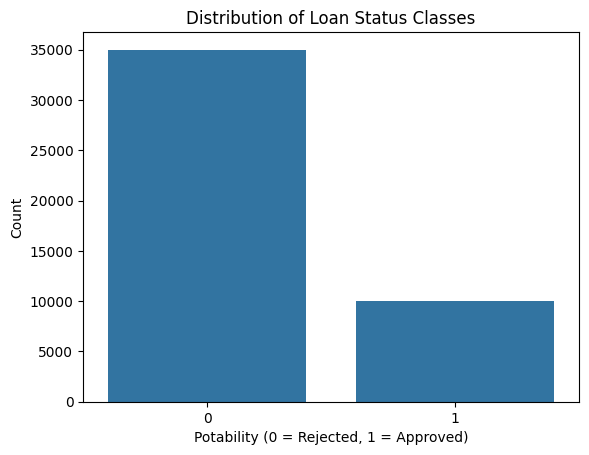

In [ ]:
sns.countplot(x='loan_status', data=df)
plt.title("Distribution of Loan Status Classes")
plt.xlabel("Potability (0 = Rejected, 1 = Approved)")
plt.ylabel("Count")
plt.show()

### Feature Distributions:

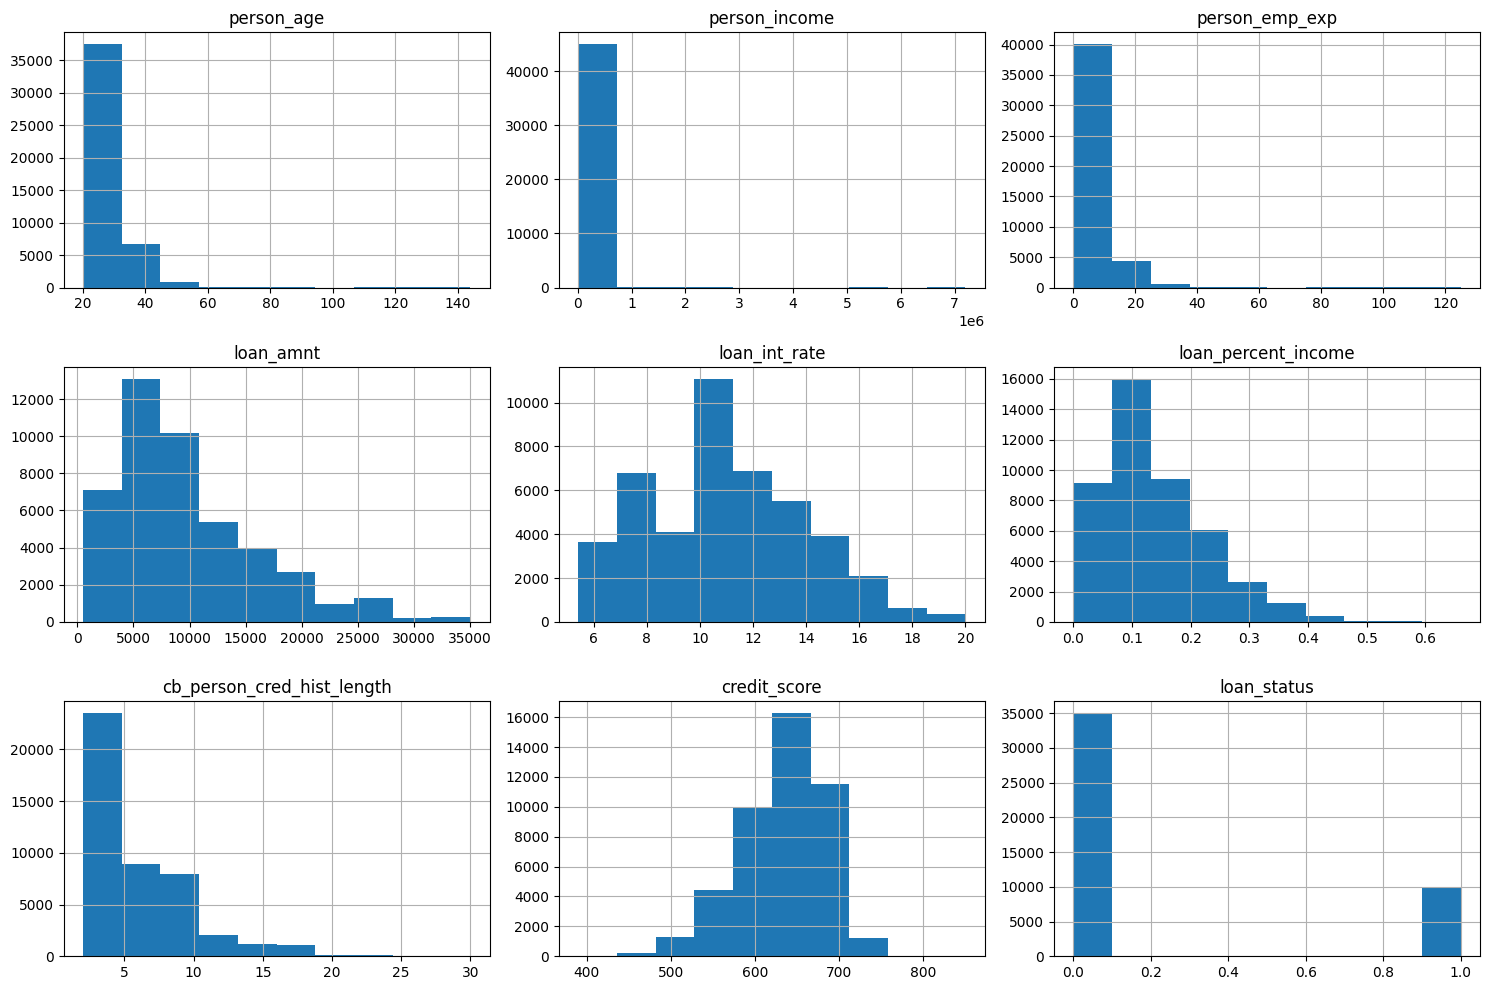

In [ ]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

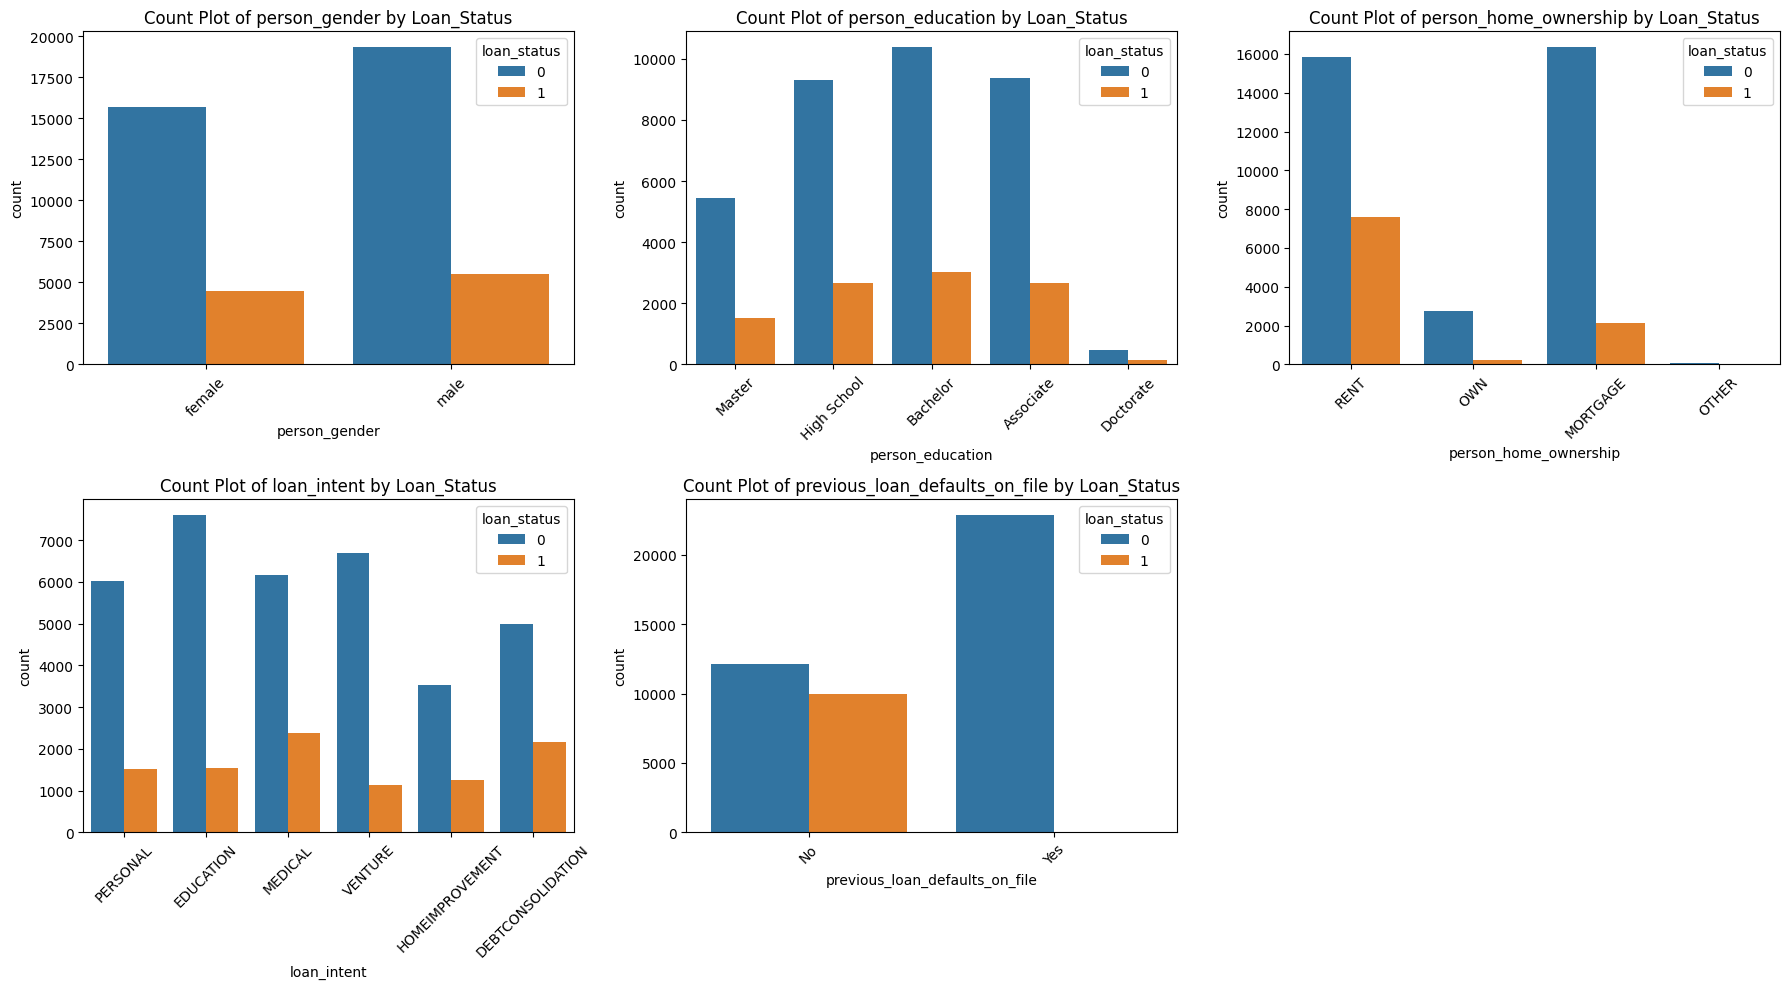

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
n_cat = len(categorical_cols)
n_rows = (n_cat + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, column in enumerate(categorical_cols):
    sns.countplot(x=column, hue='loan_status', data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column} by Loan_Status')
    axes[i].tick_params(axis='x', rotation=45)

# Turn off empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# **Data Preprocessing**


### Handle Categorical Variables:

In [ ]:
cat_cols = [var for var in df.columns if df[var].dtypes == 'object']
print(f'Categorical columns: {cat_cols}')

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
for col in cat_cols:
    print(f"Column: {col}")
    print(df[col].unique())

Column: person_gender
['female' 'male']
Column: person_education
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Column: person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Column: loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Column: previous_loan_defaults_on_file
['No' 'Yes']


In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0


# **Preparing Data For Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

### Feature Scaling:
Scaling ensures all features contribute equally to model training, especially important for algorithms like SVM or KNN.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
display(X_train)
display(X_test)

array([[ 1.03947529,  0.19422493,  0.93118562, ...,  2.22938316,
        -0.45732836, -1.01415574],
       [-0.4561859 , -0.089962  , -0.39501412, ..., -0.44855457,
         2.1866127 ,  0.98604185],
       [ 2.20276733,  2.82816736,  2.0916104 , ...,  2.22938316,
        -0.45732836,  0.98604185],
       ...,
       [ 0.87329072, -0.26104458,  0.59963569, ..., -0.44855457,
         2.1866127 ,  0.98604185],
       [-0.29000132,  1.14498636,  0.10231078, ..., -0.44855457,
        -0.45732836, -1.01415574],
       [-0.29000132,  1.52245281, -0.22923915, ...,  2.22938316,
        -0.45732836,  0.98604185]])

array([[ 0.70710614,  0.18954926,  0.76541066, ..., -0.44855457,
        -0.45732836, -1.01415574],
       [-0.62237047, -0.27833286,  0.10231078, ..., -0.44855457,
        -0.45732836,  0.98604185],
       [-0.95473963, -0.5067391 , -0.89233902, ..., -0.44855457,
        -0.45732836, -1.01415574],
       ...,
       [-0.62237047, -0.01986209, -0.72656406, ..., -0.44855457,
        -0.45732836, -1.01415574],
       [ 1.7042136 , -0.50856261,  1.76006046, ..., -0.44855457,
        -0.45732836, -1.01415574],
       [-0.4561859 , -0.53107593, -0.89233902, ..., -0.44855457,
        -0.45732836, -1.01415574]])

# **Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import joblib

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_jobs=-1)
}

In [ ]:
accuracy_scores = {}

best_model = None
best_model_name = ""
best_accuracy = 0.0
bestY_pred = None

| Metric        | Meaning                                                                    |
| ------------- | -------------------------------------------------------------------------- |
| **Precision** | Out of all predicted as this class, how many were actually correct?        |
| **Recall**    | Out of all actual instances of this class, how many did we correctly find? |
| **F1-Score**  | Harmonic mean of precision and recall — balances both.                     |
| **Support**   | Number of **actual occurrences** of the class in the dataset.              |


| Metric           | Meaning                                                               |
| ---------------- | --------------------------------------------------------------------- |
| **Accuracy**     | Overall correct predictions / total samples        |
| **Macro avg**    | Average of precision, recall, and F1 **treating all classes equally** |
| **Weighted avg** | Average of metrics **weighted by support** (i.e., class frequency)    |

In [ ]:
for name, model in models.items():
    print(f"\nTraining {name}...")

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores[name] = accuracy

    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n{classification_report(Y_test, Y_pred)}")
    print("-" * 50)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name
        bestY_pred = Y_pred


Training Logistic Regression...
Accuracy of Logistic Regression: 0.89
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.78      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.85      9000
weighted avg       0.89      0.89      0.89      9000

--------------------------------------------------

Training Support Vector Machine...
Accuracy of Support Vector Machine: 0.91
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6990
           1       0.85      0.75      0.80      2010

    accuracy                           0.91      9000
   macro avg       0.89      0.86      0.87      9000
weighted avg       0.91      0.91      0.91      9000

--------------------------------------------------

In [ ]:
joblib.dump(best_model, f'{best_model_name}.pkl')
print(f"\nBest Model: '{best_model_name}' with accuracy: {best_accuracy:.2f} — saved as '{best_model_name}.pkl'")


Best Model: 'Random Forest' with accuracy: 0.93 — saved as 'Random Forest.pkl'


# **Model Evaluation**

### Confusion Matrix

Confusion Matrix:


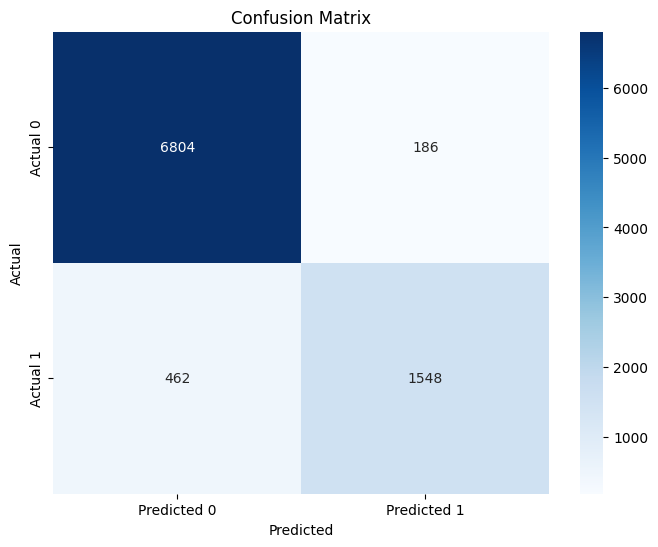

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Confusion Matrix
cm = confusion_matrix(Y_test, bestY_pred)
print("Confusion Matrix:")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **---- BONUS SECTION ----**

In [ ]:
from sklearn.ensemble import (
    ExtraTreesClassifier, GradientBoostingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
models = {
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGB': HistGradientBoostingClassifier(),
}

In [ ]:
for name, model in models.items():
    print(f"\nTraining {name}...")

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores[name] = accuracy

    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n{classification_report(Y_test, Y_pred)}")
    print("-" * 50)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name
        bestY_pred = Y_pred


Training LightGBM...
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy of LightGBM: 0.93
Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.79      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000

--------------------------------------------------

Training XGBoost...
Accuracy of XGBoost: 0.93
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000

--------------------------------------------------

Training Extra Trees...
Accuracy of Extra Trees: 0.92
Classification Report for Extra Trees:
     